In [134]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [115]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [116]:
dataset = sns.load_dataset("mpg")
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [117]:
Y = dataset.iloc[:,-2].values
Y = np.unique(Y)
columns = list(dataset.columns)
columns

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

Text(0, 0.5, 'MPG')

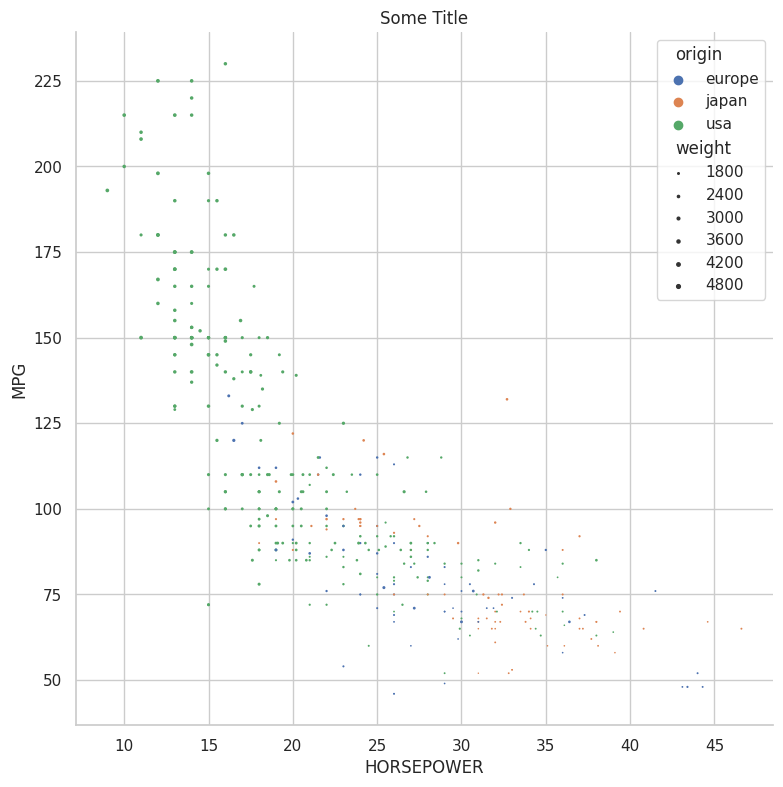

In [121]:
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(9, 9))
sns.despine(f, left=False, bottom=False)
clarity_ranking = list(Y)
sns.scatterplot(x=columns[0], y=columns[3],
                hue=columns[-2], size=columns[4],
                palette="deep",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=dataset, ax=ax)
ax.set_title("Some Title")
ax.set_xlabel(columns[3].upper())
ax.set_ylabel(columns[0].upper())

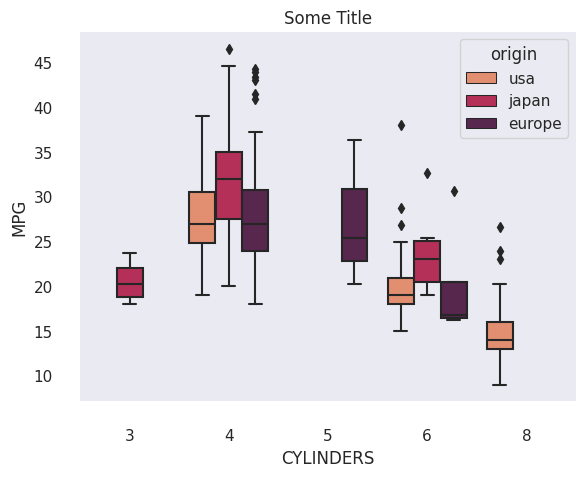

In [132]:
sns.set_theme(style="dark", palette="rocket_r")

# Load the example tips dataset
tips = dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=columns[1], y=columns[0],
            hue=columns[-2], palette="rocket_r",
            data=tips).set(title="Some Title", xlabel = columns[1].upper(), ylabel = columns[0].upper())
sns.despine(offset=10, trim=True)

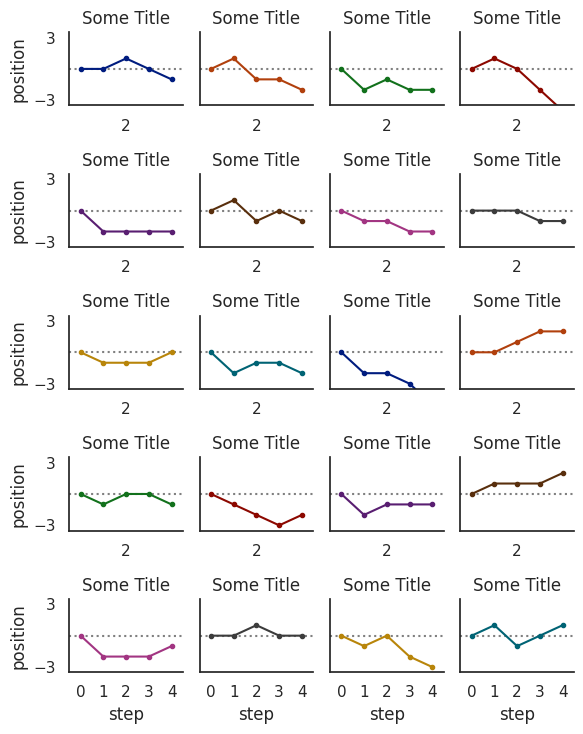

In [157]:
sns.set_theme(style="white")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-2, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="dark",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker=".")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5), title=f"Some Title")

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

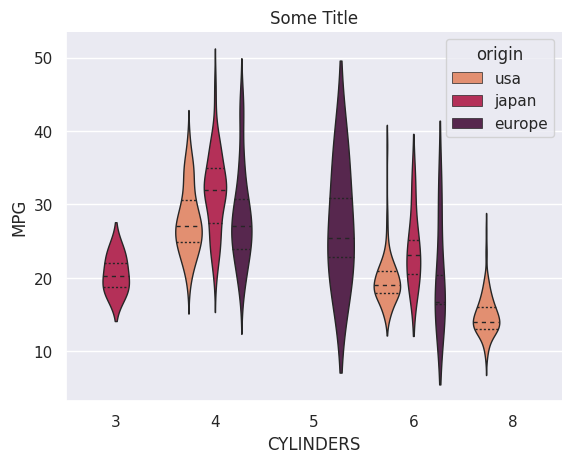

In [171]:
sns.set_theme(style="darkgrid")

# Load the example tips dataset
tips = dataset

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=tips, x=columns[1], y=columns[0], hue=columns[-2],
               split=False, inner="quart", linewidth=1,
               palette="rocket_r").set(title="Some Title", xlabel = columns[1].upper(), ylabel = columns[0].upper())
sns.despine(left=False)

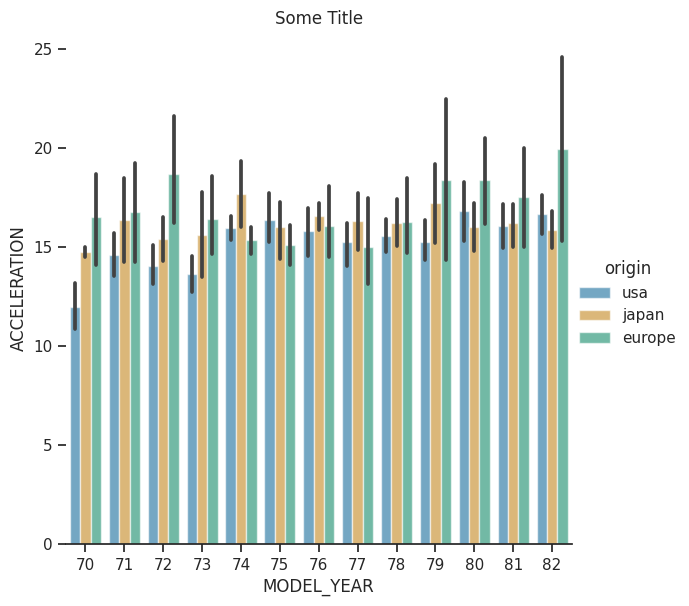

In [175]:
sns.set_theme(style="ticks")

penguins = dataset

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x=columns[-3], y=columns[-4], hue=columns[-2],
    errorbar='ci', palette="colorblind", alpha=.6, height=6
).set(title="Some Title", xlabel = columns[-3].upper(), ylabel = columns[-4].upper())
g.despine(left=True)

[Text(0.5, 1.0, 'Some Title')]

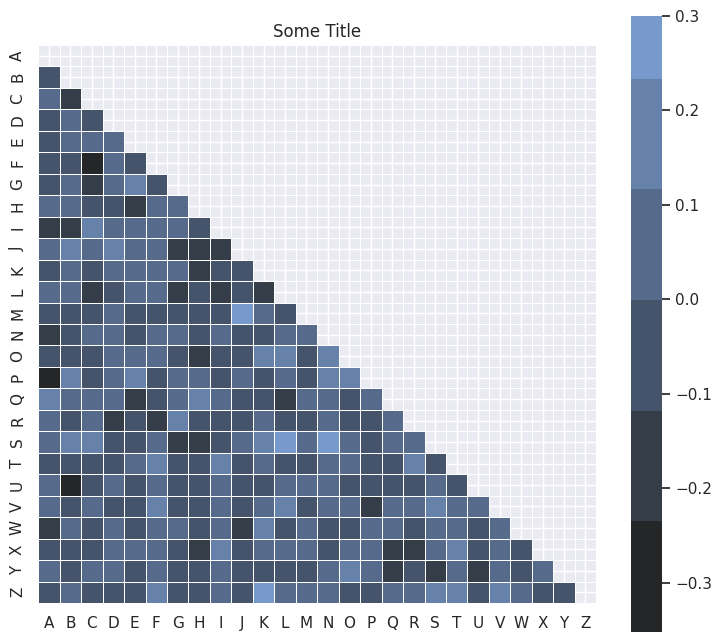

In [183]:
from string import ascii_letters

sns.set_theme(style="darkgrid")

# Generate a large random dataset
rs = np.random.RandomState(26)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 16))

# Generate a custom diverging colormap
cmap = sns.dark_palette("#79C")

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title="Some Title")

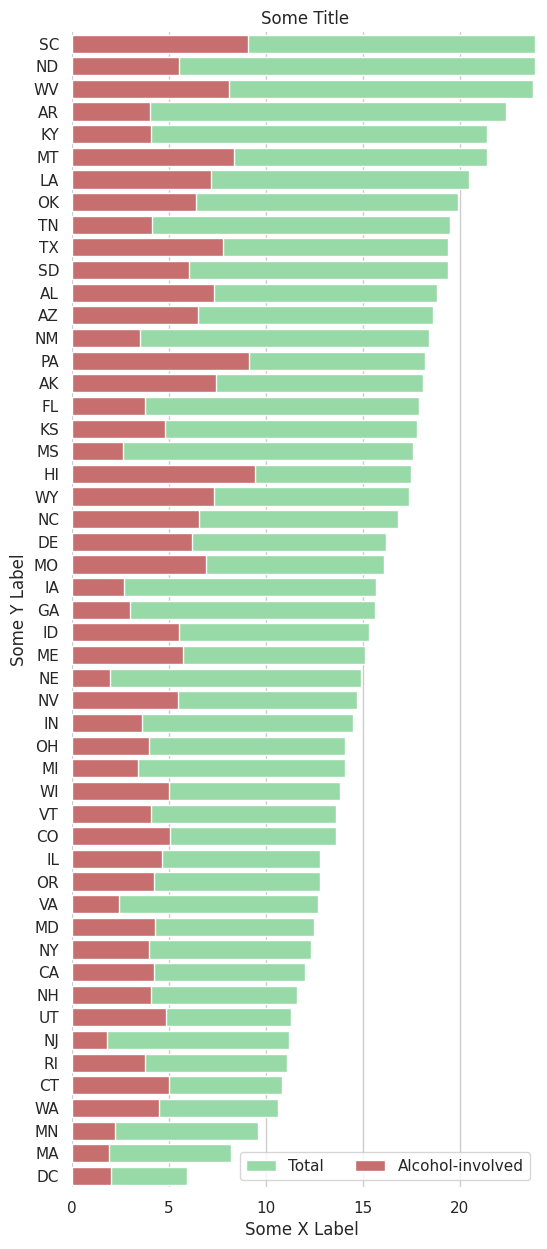

In [196]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="g")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="speeding", y="abbrev", data=crashes,
            label="Speed-involved", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24),
       xlabel="Some X Label ", title="Some Title", ylabel = "Some Y Label")
sns.despine(left=True, bottom=True)

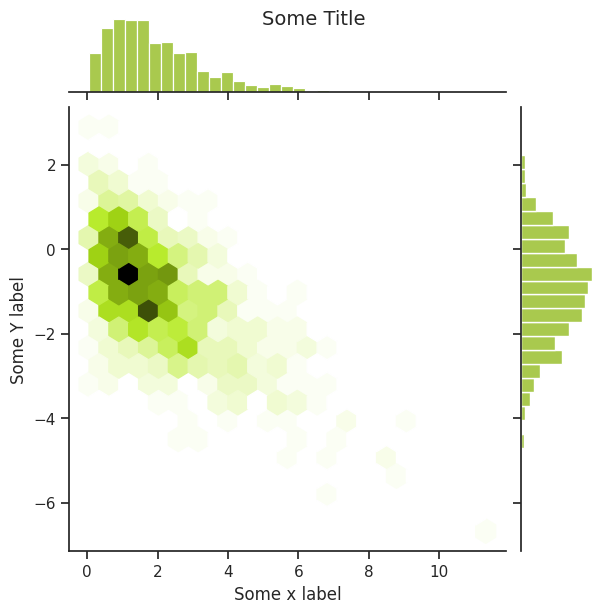

In [199]:
sns.set_theme(style="ticks")
rs = np.random.RandomState(47)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.set_palette("Dark2")
g = sns.jointplot(x=x, y=y, kind="hex", color="#8CB812", gridsize=20)

g.set_axis_labels("Some x label", "Some Y label", fontsize=12)
g.fig.suptitle("Some Title", fontsize=14)
plt.show()